# Exercise 2 : KNN

Prepared By: Tan Pei Seng

## Answer for Question 1

### a) What are the types of the attributes?
1. age - numerical
  * It can be counted from 17-90 and they are numbers. 
2. workclass - categorical
  * It contains 8 categories. 
3. fnlwgt - numerical
  * It likes a specific unique number for each row of most of the data and they are numbers. 
4. education - categorical
  * It contains 16 categories. 
5. education-num - numerical
  * It can be counted from 1-16 and they are numbers. 
6. marital-status - categorical
  * It contains 7 categories. 
7. occupation - categorical
  * It contains 14 categories. 
8. relationship - categorical
  * It contains 6 categories. 
9. race - categorical
  * It contains 5 categories. 
10. sex - binary
  * It contains 2 categories only. 
11. capital-gain - numerical
  * They are numbers. 
12. capital-loss - numerical
  * They are numbers. 
13. hours-per-week - numerical
  * They can be counted from 1-99 and they are numbers. 
14. native-country - categorical
  * It contains 41 categories.
15. income - binary
  * It contains 2 categories only.

### b) Is there any empty or null values? What approach you use to address them (remove, replace, etc.)? and why?
Yes, there are empty values in the columns named "workclass" (1836 missing values), "occupation" (1843 missing values) and "native-country" (583 missing values). It is shown in cell 5 and 6. Since three of these columns contains categorical values, the simplest approach that can be applied is to replace these empty values by using mode. In the "workclass" and "native-country" columns, mode approach can be applied as the count for the first highest count’s category is at least 5 times more than the second highest count’s categories. The addition of the count from the missing values after the replacement with mode approach will not affect much onto the end result. However, for the “occupation” column, the count of the first highest count’s category is close to the count of the second and the third highest count’s categories. Thus, it is better to create a new category to store them so the result might not be much affected.   

### c) Any unused or irrelevant columns/attributes? What do you do to them?
All the attributes that are used for training by using KNN approach must be in numerical. All the categorical data are transformed into the numerical data with the aids of "sklearn" library. 

### d) What attribute(s) might be useful?
The attributes that might be useful are "age", "workclass", "education", "education-num", "occupation", "capital-gain", "capital-loss", "hours-per-week" and "native-country". 

## Answer for Question 2

### a) Do higher values of k lead to better performance?
In this case. it is not. Higher values of k does not lead to better performance. Initially, when the k is increased, the accuracy score is increased. However, after the k is reached its optimum accuracy score, the graph line becomes flat or even starts to drop. The accuracy score of custom KNN configuration model drops slower than the default one.

### b) Do cross-validation effect KNN performance?
In this case, the cross-validation model performs the same with the KNN model without cross validation. The accuracy score is 80%. 

In [1]:
import pandas as pd
 
colNames = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

#Import train data

df_train=pd.read_csv('adult_train.csv', names=colNames)

df_train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [2]:
df_train.shape

(32561, 15)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# To determine which coloumn contains empty values. 
for i in colNames:
    try:
        Class_=df_train[df_train[i]==" ?"].count()[i]
    except:
        Class_=0
    print("Missing Values for {}: {}".format(i, str(Class_)))

Missing Values for age: 0
Missing Values for workclass: 1836
Missing Values for fnlwgt: 0
Missing Values for education: 0
Missing Values for education-num: 0
Missing Values for marital-status: 0
Missing Values for occupation: 1843
Missing Values for relationship: 0
Missing Values for race: 0
Missing Values for sex: 0
Missing Values for capital-gain: 0
Missing Values for capital-loss: 0
Missing Values for hours-per-week: 0
Missing Values for native-country: 583
Missing Values for income: 0


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


In [6]:
#Calculate the percentage of the missing values in these columns. 
for i in ["workclass", "occupation", "native-country"]:
    Class1=df_train[df_train[i]==" ?"].count()[i]
    Class0=df_train[df_train[i]!=" ?"].count()[i]
    print("Coloumn: "+i)
    print("Total number of Missing: " + str(Class1))
    print("Total number of Non Missing: " + str(Class0))
    print("Percentage of missing value: {}{}".format(Class1/(Class1+Class0)*100, "%"))

Coloumn: workclass
Total number of Missing: 1836
Total number of Non Missing: 30725
Percentage of missing value: 5.638647461687294%
Coloumn: occupation
Total number of Missing: 1843
Total number of Non Missing: 30718
Percentage of missing value: 5.660145572924664%
Coloumn: native-country
Total number of Missing: 583
Total number of Non Missing: 31978
Percentage of missing value: 1.7904855501980899%


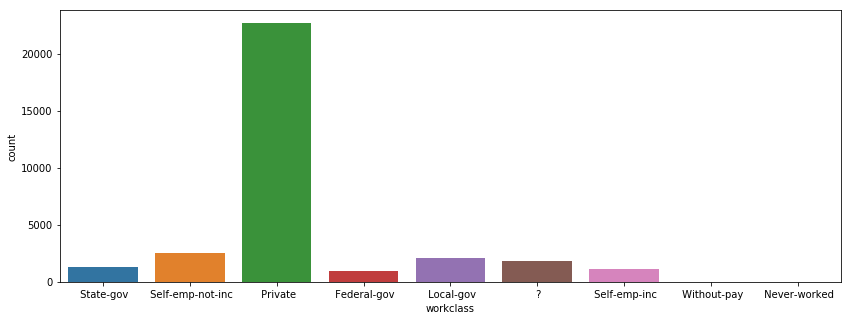

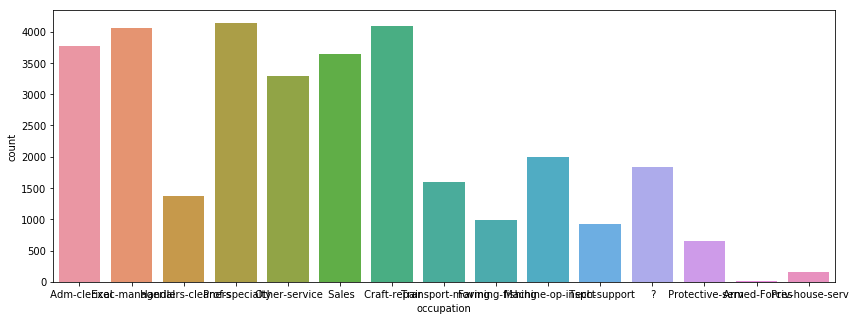

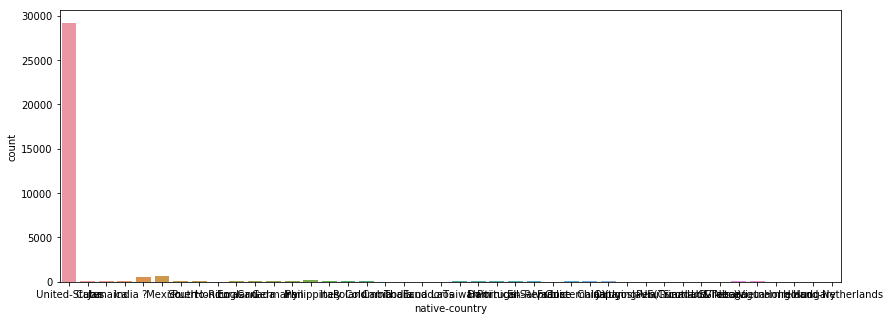

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#To display the count of columns that contain empty values. 
for i in ["workclass", "occupation", "native-country"]:
    plt.figure(figsize=(14, 5))
    sns.countplot(x=i, data=df_train)
    plt.show()

In [8]:
#Replace the empty values to desired values
df_train["workclass"].replace(" ?", ' Private')
df_train["native-country"].replace(" ?", ' United-States')
df_train["occupation"].replace(" ?", ' Not stated')

0              Adm-clerical
1           Exec-managerial
2         Handlers-cleaners
3         Handlers-cleaners
4            Prof-specialty
5           Exec-managerial
6             Other-service
7           Exec-managerial
8            Prof-specialty
9           Exec-managerial
10          Exec-managerial
11           Prof-specialty
12             Adm-clerical
13                    Sales
14             Craft-repair
15         Transport-moving
16          Farming-fishing
17        Machine-op-inspct
18                    Sales
19          Exec-managerial
20           Prof-specialty
21            Other-service
22          Farming-fishing
23         Transport-moving
24             Tech-support
25             Tech-support
26             Craft-repair
27               Not stated
28          Exec-managerial
29             Craft-repair
                ...        
32531            Not stated
32532        Prof-specialty
32533       Exec-managerial
32534          Adm-clerical
32535       Protecti

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# select the categorical columns 
cols_index = [1, 3, 5, 6, 7, 8, 9, 13, 14]

#encode categorical features
for i in cols_index:
    df_train.iloc[:, i] = labelencoder.fit_transform(df_train.iloc[:, i])

#split into input and output
x_train=df_train.iloc[:,:-1]
y_train=df_train.iloc[:,-1]

In [10]:
#Import Test Data

df_test=pd.read_csv('adult_test.csv', names=colNames)

df_test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
7,29,?,227026.0,HS-grad,9.0,Never-married,?,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K.
8,63,Self-emp-not-inc,104626.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K.
9,24,Private,369667.0,Some-college,10.0,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K.


In [11]:
#Remove the first row of test dataset
df_test.drop(df_test.index[0], inplace=True)

df_test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
7,29,?,227026.0,HS-grad,9.0,Never-married,?,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K.
8,63,Self-emp-not-inc,104626.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K.
9,24,Private,369667.0,Some-college,10.0,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K.
10,55,Private,104996.0,7th-8th,4.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,10.0,United-States,<=50K.


In [12]:
# To determine which coloumn contains empty values. 
for i in colNames:
    try:
        Class_=df_test[df_test[i]==" ?"].count()[i]
    except:
        Class_=0
    print("Missing Values for {}: {}".format(i, str(Class_)))

Missing Values for age: 0
Missing Values for workclass: 963
Missing Values for fnlwgt: 0
Missing Values for education: 0
Missing Values for education-num: 0
Missing Values for marital-status: 0
Missing Values for occupation: 966
Missing Values for relationship: 0
Missing Values for race: 0
Missing Values for sex: 0
Missing Values for capital-gain: 0
Missing Values for capital-loss: 0
Missing Values for hours-per-week: 0
Missing Values for native-country: 274
Missing Values for income: 0


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


In [13]:
#Replace the empty values to desired values
df_test["workclass"].replace(" ?", ' Private')
df_test["native-country"].replace(" ?", ' United-States')
df_test["occupation"].replace(" ?", ' Not stated')

1         Machine-op-inspct
2           Farming-fishing
3           Protective-serv
4         Machine-op-inspct
5                Not stated
6             Other-service
7                Not stated
8            Prof-specialty
9             Other-service
10             Craft-repair
11        Machine-op-inspct
12             Adm-clerical
13             Adm-clerical
14               Not stated
15        Machine-op-inspct
16          Exec-managerial
17            Other-service
18             Adm-clerical
19        Machine-op-inspct
20           Prof-specialty
21             Tech-support
22            Other-service
23               Not stated
24           Prof-specialty
25           Prof-specialty
26             Craft-repair
27             Adm-clerical
28        Machine-op-inspct
29             Craft-repair
30           Prof-specialty
                ...        
16252            Not stated
16253        Prof-specialty
16254          Tech-support
16255        Prof-specialty
16256       Exec-man

In [14]:
#encode categorical features
for i in cols_index:
    df_test.iloc[:, i] = labelencoder.fit_transform(df_test.iloc[:, i])

#split into input and output
x_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]

The optimal number of neighbors is 29
The optimal score is 0.80


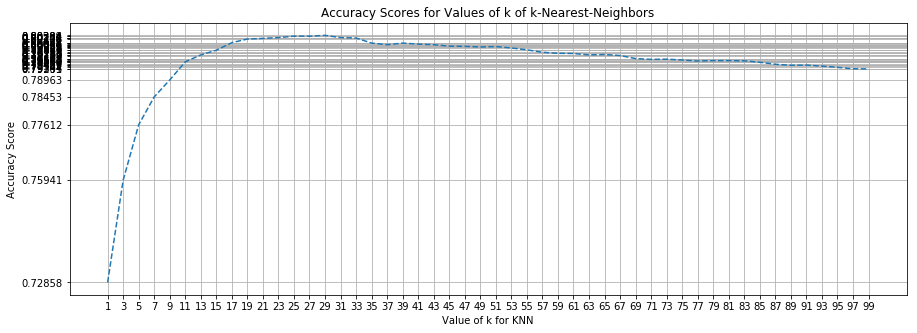

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

# Default KNN configuration 
# Without cross validation
scores=[]
lrange=list(range(1, 100, 2))

for k in lrange:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
optimal_k=lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2, figsize=(15,5))

plt.plot(lrange, scores, ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.xticks(lrange)
plt.yticks(scores)

plt.grid()
plt.show()

The optimal number of neighbors is 31
The optimal score is 0.80


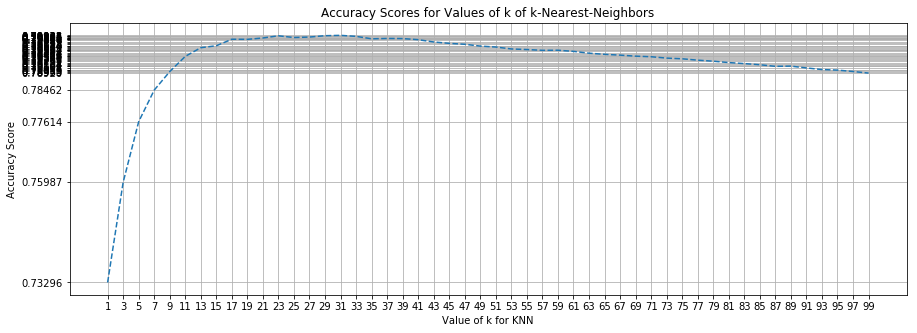

In [16]:
from sklearn.model_selection import cross_val_score

scores=[]
lrange=list(range(1, 100, 2))

# Default KNN configuration 
# With 10 fold cross validation
for k in lrange:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())
    
optimal_k=lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2, figsize=(15,5))

plt.plot(lrange, scores, ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.xticks(lrange)
plt.yticks(scores)

plt.grid()
plt.show()

The optimal number of neighbors is 43
The optimal score is 0.80


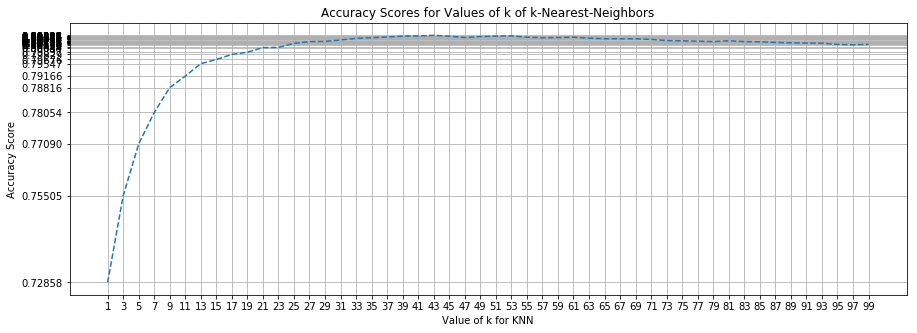

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

# Custom KNN configuration (weights is set to be "distance and algorithm is set to be "auto)
# Without cross validation
scores=[]
lrange=list(range(1, 100, 2))

for k in lrange:
    knn=KNeighborsClassifier(n_neighbors=k, weights="distance", algorithm="auto")
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
optimal_k=lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2, figsize=(15,5))

plt.plot(lrange, scores, ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.xticks(lrange)
plt.yticks(scores)

plt.grid()
plt.show()

The optimal number of neighbors is 43
The optimal score is 0.80


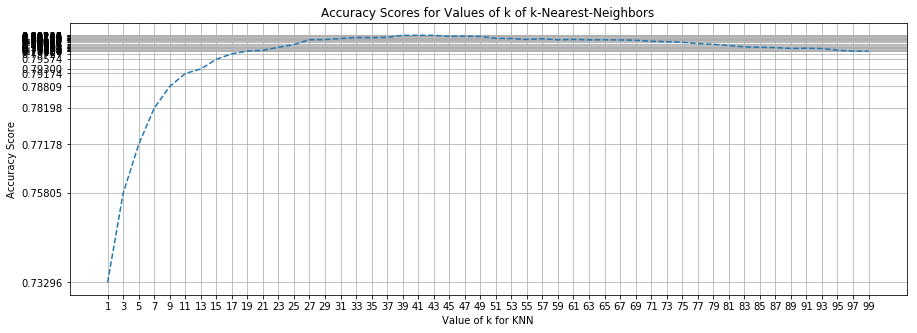

In [18]:
from sklearn.model_selection import cross_val_score

scores=[]
lrange=list(range(1, 100, 2))

# Custom KNN configuration (weights is set to be "distance and algorithm is set to be "auto) 
# With 10 fold cross validation
for k in lrange:
    knn=KNeighborsClassifier(n_neighbors=k, weights="distance", algorithm="auto")
    score=cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())
    
optimal_k=lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2, figsize=(15,5))

plt.plot(lrange, scores, ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.xticks(lrange)
plt.yticks(scores)

plt.grid()
plt.show()